# Testing with Synthetic Data

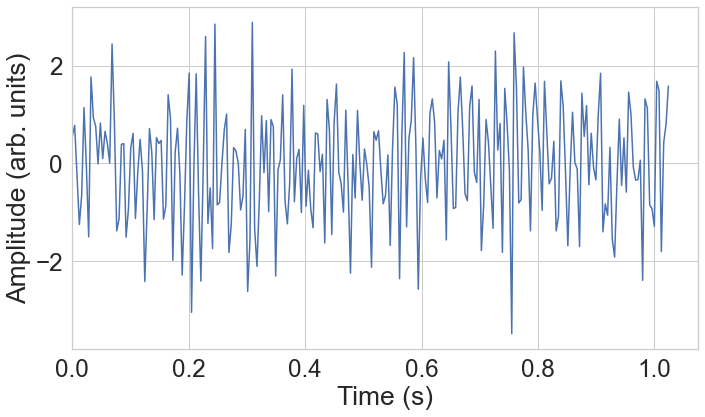

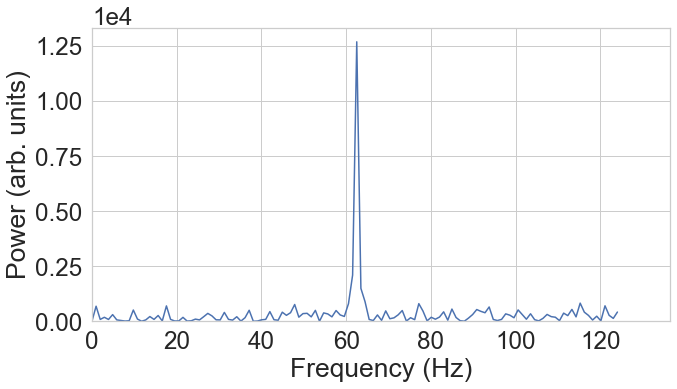

Recovered frequencies from spectrum: [-115.234375   115.234375   -64.453125    64.453125    63.4765625
  -63.4765625   61.5234375  -61.5234375  -62.5         62.5      ]
Power of the peaks: [  825.46909032   825.46909032   892.86882338   892.86882338
  1496.09514031  1496.09514031  2100.86735155  2100.86735155
 12691.3574259  12691.3574259 ]


In [166]:
#Testing the code with fake data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", font_scale=2.2)


# Parameters for synthetic data
num_samples = 256
sampling_rate = 1/0.004  # Hz
freq1 = 62  # Hz
noise_level = 1
time = np.linspace(0, num_samples * 1/sampling_rate, num_samples)

# Generate synthetic data
def generate_synthetic_data(num_sample, freq1, noise_level, t = np.linspace(0, num_samples * 1/sampling_rate, num_samples)):
    signal1 = np.sin(2 * np.pi * freq1 * t)
    noise = np.random.normal(0, noise_level, num_sample)
    synthetic_data = signal1 + noise
    return synthetic_data

# Perform Fourier transform to recover frequencies
def recover_frequencies(data, sampling_rate):
    N = len(data)
    frequencies = np.fft.fftfreq(N, d=1/sampling_rate)
    fft_data = np.fft.fft(data)
    power_spectrum = np.abs(fft_data)**2
    return frequencies, power_spectrum

# Generate synthetic data
synthetic_data = generate_synthetic_data(num_samples, freq1,  noise_level)

# Plot synthetic data
plt.figure(figsize=(10, 6))
sns.lineplot(x=time, y=synthetic_data)
plt.tight_layout()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (arb. units)')
plt.xlim(0, )
plt.savefig('synthetic_data.png')
plt.show()

# Perform Fourier transform
frequencies, power_spectrum = recover_frequencies(synthetic_data, sampling_rate)

# Plot power spectrum
plt.figure(figsize=(10, 6))
sns.lineplot(x=frequencies, y=power_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (arb. units)')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim(0,)
plt.ylim(0,)
plt.tight_layout()
plt.savefig('power_spectrum_synthetic.png')
plt.show()

# Find peaks in power spectrum
peaks_idx = np.argsort(power_spectrum)[-10:]  # Get indices of two highest peaks
#peaks_idx = np.argsort(power_spectrum)[::-1][:10]  # Get indices of ten highest peaks in descending order

freq_syn = frequencies[peaks_idx]  # Get corresponding frequencies
power_syn = power_spectrum[peaks_idx]  # Get corresponding power
print("Recovered frequencies from spectrum:", freq_syn)
print("Power of the peaks:", power_syn)


## Shuffling

In [35]:
'''
# Shuffle data up
rng = np.random.default_rng()


shuffled = synthetic_data.copy()
rng.shuffle(shuffled)
if np.array_equal(synthetic_data, shuffled):
    print("Data is not shuffled")


# Plot shuffled data
plt.figure(figsize=(10, 6))
sns.lineplot(x=time, y=shuffled)
#plt.title('Shuffled data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (arb. units)')
plt.show()

# Perform shuffled Fourier transform
frequencies, power_spectrum = recover_frequencies(shuffled, sampling_rate)

# Plot the shuffled power spectrum
plt.figure(figsize=(10, 6))
power_spectrum[0] = 0 #setting to zero to remove the constant, non varying luminosity
sns.lineplot(x=frequencies, y=power_spectrum)
#plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (arb. units)')
plt.xlim(0,)
plt.tight_layout()
plt.show()


# Find peaks in power spectrum
peaks_idx = np.argsort(power_spectrum)[-10:]  # Get indices of two highest peaks
peak_freqs = frequencies[peaks_idx]  # Get corresponding frequencies
peak_power = power_spectrum[peaks_idx]  # Get corresponding power
print("Recovered frequencies from spectrum:", peak_freqs)
print("Power of the peaks:", peak_power)
'''

'\n# Shuffle data up\nrng = np.random.default_rng()\n\n\nshuffled = synthetic_data.copy()\nrng.shuffle(shuffled)\nif np.array_equal(synthetic_data, shuffled):\n    print("Data is not shuffled")\n\n\n# Plot shuffled data\nplt.figure(figsize=(10, 6))\nsns.lineplot(x=time, y=shuffled)\n#plt.title(\'Shuffled data\')\nplt.xlabel(\'Time (s)\')\nplt.ylabel(\'Amplitude (arb. units)\')\nplt.show()\n\n# Perform shuffled Fourier transform\nfrequencies, power_spectrum = recover_frequencies(shuffled, sampling_rate)\n\n# Plot the shuffled power spectrum\nplt.figure(figsize=(10, 6))\npower_spectrum[0] = 0 #setting to zero to remove the constant, non varying luminosity\nsns.lineplot(x=frequencies, y=power_spectrum)\n#plt.title(\'Power Spectrum\')\nplt.xlabel(\'Frequency (Hz)\')\nplt.ylabel(\'Power (arb. units)\')\nplt.xlim(0,)\nplt.tight_layout()\nplt.show()\n\n\n# Find peaks in power spectrum\npeaks_idx = np.argsort(power_spectrum)[-10:]  # Get indices of two highest peaks\npeak_freqs = frequencies[p

## Actually Shuffling Loads

In [167]:
n_trials = 100000
peaks_syn = np.zeros(n_trials)
for i in range(n_trials):   
    shuffled = synthetic_data.copy()
    rng.shuffle(shuffled)
    frequencies, power_spectrum = recover_frequencies(shuffled, sampling_rate)
    peaks_idx = np.argsort(power_spectrum)[-2:]  # Get indices of two highest peaks
    peak_power = power_spectrum[peaks_idx]  # Get corresponding power
    #print("Power of the peaks:", peak_power[0]) # Power of the second highest peak, as highest is with zero frequency, the constant luminosity
    peaks_syn[i] = peak_power[0]
print(peaks_syn)
np.save('peaks_syn.npy', peaks_syn)

[1686.24797988 2399.49846007 1930.28674928 ... 2404.96152418 2783.12185798
 2081.44956576]


In [168]:
peaks_syn = np.load('peaks_syn.npy')
above_1st_peak = (peaks_syn > power_syn[-1]).sum()
print("Number of peaks above the 1st peak in the actual data:", above_1st_peak, "at frequency:", freq_syn[-1], "Hz")
above_2nd_peak = (peaks_syn > power_syn[-3]).sum()
print("Number of peaks above the 2nd peak in the actual data:", above_2nd_peak, "at frequency:", freq_syn[-3], "Hz")
above_3rd_peak = (peaks_syn > power_syn[-5]).sum()
print("Number of peaks above the 3rd peak in the actual data:", above_3rd_peak, "at frequency:", freq_syn[-5], "Hz")
above_4th_peak = (peaks_syn > power_syn[-7]).sum()
print("Number of peaks above the 4th peak in the actual data:", above_4th_peak, "at frequency:", freq_syn[-8], "Hz")
above_5th_peak = (peaks_syn > power_syn[-9]).sum()
print("Number of peaks above the 5th peak in the actual data:", above_5th_peak, "at frequency:", freq_syn[-9], "Hz")

chance1st = above_1st_peak/n_trials
chance2nd = above_2nd_peak/n_trials
chance3rd = above_3rd_peak/n_trials
chance4th = above_4th_peak/n_trials
chance5th = above_5th_peak/n_trials

Number of peaks above the 1st peak in the actual data: 0 at frequency: 62.5 Hz
Number of peaks above the 2nd peak in the actual data: 30435 at frequency: -61.5234375 Hz
Number of peaks above the 3rd peak in the actual data: 89728 at frequency: -63.4765625 Hz
Number of peaks above the 4th peak in the actual data: 100000 at frequency: -64.453125 Hz
Number of peaks above the 5th peak in the actual data: 100000 at frequency: 115.234375 Hz


### Plotting it

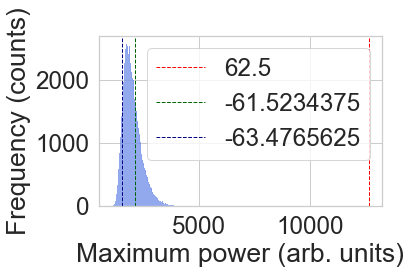

In [169]:
# Create histogram using Seaborn
sns.histplot(peaks_syn, kde=False, color='royalblue')

# Add labels and title
plt.xlabel('Maximum power (arb. units)')
plt.ylabel('Frequency (counts)')
plt.tight_layout()
plt.axvline(power_syn[-1], color='red', linestyle='dashed', linewidth=1, label=freq_syn[-1])
plt.axvline(power_syn[-3], color='darkgreen', linestyle='dashed', linewidth=1, label=freq_syn[-3])
plt.axvline(power_syn[-5], color='navy', linestyle='dashed', linewidth=1, label=freq_syn[-5])

plt.legend()

# Show plot
plt.show()

## Folding data

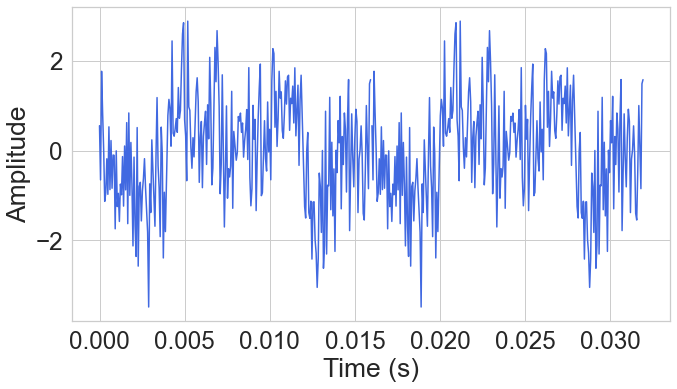

In [176]:
# Folding data
def fold_data(foldfreq, time):
    foldperiod = 1/foldfreq
    foldedtime = time % foldperiod
    return foldedtime

testfreq = 62.49493
foldedtime = fold_data(testfreq, time)

# Plot folded data
plt.figure(figsize=(10, 6))
sns.lineplot(x=foldedtime, y=synthetic_data, color='royalblue')
sns.lineplot(x=foldedtime + 1/testfreq, y=synthetic_data, color='royalblue')
#plt.title('Shuffled data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()



## Finding best frequency

In [180]:
i = 0
steps = 10000
min = 61
max = 64
bins = 12

Allchi = np.zeros(steps)
for f in np.linspace(min, max, steps):    
    datus = synthetic_data.copy()
    foldedtime = fold_data(f, time)
    tempo = foldedtime.copy()
    idx   = np.argsort(tempo)
    datus = np.array(datus)[idx]
    tempo = np.array(tempo)[idx]
    binned = phase_binning(datus, tempo, bins, 1/f)
    chi2 = np.abs(stats.chisquare(binned))
    Allchi[i] = chi2[0]
    i += 1
print(Allchi)
print(np.nanargmax(Allchi))
countnan = np.count_nonzero(np.isnan(Allchi))
print('Maximum chi2:', np.nanmax(Allchi))
print('At Freq = ', min+np.nanargmax(Allchi)/(steps/(max-min)), "Hz")
Pulsarfreq = min+np.nanargmax(Allchi)/(steps/(max-min))


[ 22.39620347  24.17965777  24.17965777 ... 101.41724827 101.41724827
 101.41724827]
4983
Maximum chi2: 402240.4297531816
At Freq =  62.4949 Hz


# Actual Data

## Doing Power Spectrum

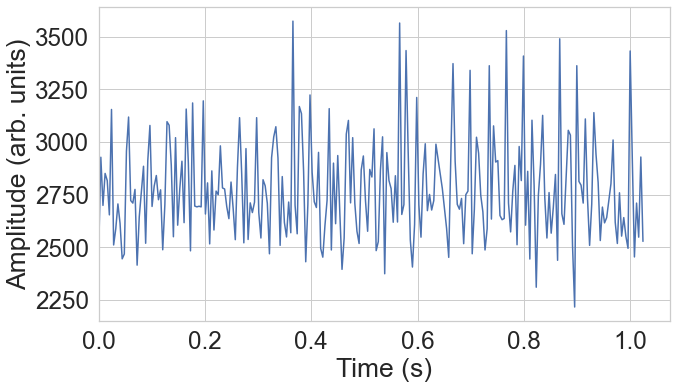

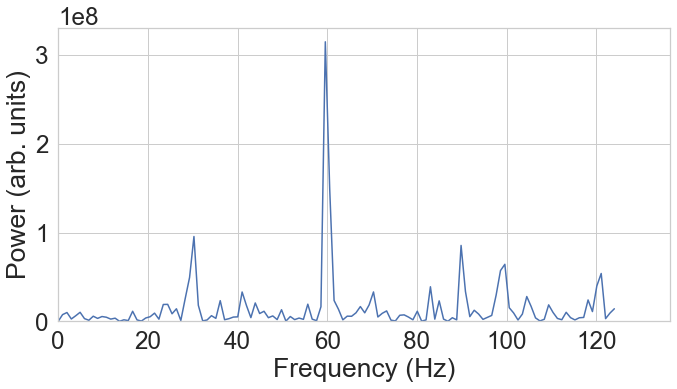

Recovered frequencies from spectrum: [  83.0078125  -83.0078125  120.1171875 -120.1171875   29.296875
  -29.296875   121.09375   -121.09375    -98.6328125   98.6328125
  -99.609375    99.609375    89.84375    -89.84375    -30.2734375
   30.2734375  -60.546875    60.546875   -59.5703125   59.5703125]
Power of peaks: [3.89064808e+07 3.89064808e+07 3.98419404e+07 3.98419404e+07
 4.94164063e+07 4.94164063e+07 5.38588470e+07 5.38588470e+07
 5.71171975e+07 5.71171975e+07 6.41952923e+07 6.41952923e+07
 8.54356971e+07 8.54356971e+07 9.55060162e+07 9.55060162e+07
 1.49044562e+08 1.49044562e+08 3.14806446e+08 3.14806446e+08]


In [383]:
data = np.genfromtxt('pulsar.dat') #import data
number_of_samples = len(data)
periodsample = 0.004 # seconds
time = np.linspace(0, number_of_samples*periodsample, number_of_samples)

# Plot actual data
plt.figure(figsize=(10, 6))
sns.lineplot(x=time, y=data)
#plt.title('Actual data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (arb. units)')
plt.tight_layout()
plt.xlim(0, )
plt.savefig('actual_data.png')
plt.show()

sampling_rate = 1/periodsample  # per milli second

# Perform Fourier transform
frequencies, power_spectrum = recover_frequencies(data, sampling_rate)
# Plot power spectrum
plt.figure(figsize=(10, 6))
power_spectrum[0] = 0 #setting to zero to remove the constant, non varying luminosity
sns.lineplot(x=frequencies, y=power_spectrum)
#plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (arb. units)')
plt.xlim(0,)
plt.ylim(0,)
plt.tight_layout()
plt.savefig('power_spectrum_actual.png')
plt.show()


# Find peaks in power spectrum
peaks_idx = np.argsort(power_spectrum)[-20:]  # Get indices of two highest peaks
freqs_actual = frequencies[peaks_idx]  # Get corresponding frequencies
powers_actual = power_spectrum[peaks_idx]  # Get corresponding power
print("Recovered frequencies from spectrum:", freqs_actual)
print("Power of peaks:", powers_actual)


## Shuffling

### Testing if shuffling works

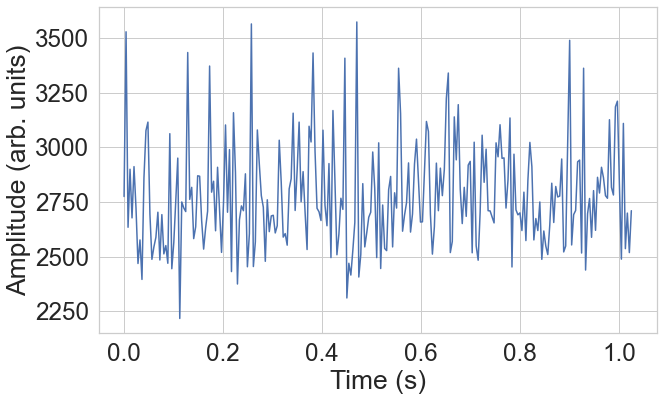

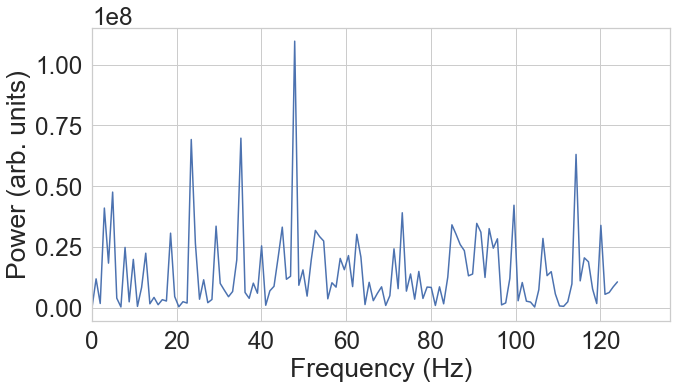

Recovered frequencies from spectrum: [47.8515625]
Power of the peaks: [1.09595627e+08]


In [384]:
# Shuffle data up
rng = np.random.default_rng()


shuffled = data.copy()
rng.shuffle(shuffled)
if np.array_equal(data, shuffled):
    print("Data is not shuffled")


# Plot shuffled data
plt.figure(figsize=(10, 6))
sns.lineplot(x=time, y=shuffled)
#plt.title('Shuffled data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (arb. units)')
plt.show()

# Perform shuffled Fourier transform
frequencies, power_spectrum = recover_frequencies(shuffled, sampling_rate)

# Plot the shuffled power spectrum
plt.figure(figsize=(10, 6))
power_spectrum[0] = 0 #setting to zero to remove the constant, non varying luminosity
sns.lineplot(x=frequencies, y=power_spectrum)
#plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (arb. units)')
plt.xlim(0,)
plt.tight_layout()
plt.show()


# Find peaks in power spectrum
peaks_idx = np.argsort(power_spectrum)[-1:]  # Get indices of two highest peaks
peak_freqs = frequencies[peaks_idx]  # Get corresponding frequencies
peak_power = power_spectrum[peaks_idx]  # Get corresponding power
print("Recovered frequencies from spectrum:", peak_freqs)
print("Power of the peaks:", peak_power)


## Actual Shuffling

In [71]:

'''
n_trials = 100000000
peaks = np.zeros(n_trials)
for i in range(n_trials):   
    shuffled = data.copy()
    rng.shuffle(shuffled)
    frequencies, power_spectrum = recover_frequencies(shuffled, sampling_rate)
    peaks_idx = np.argsort(power_spectrum)[-2:]  # Get indices of two highest peaks
    peak_power = power_spectrum[peaks_idx]  # Get corresponding power
    #print("Power of the peaks:", peak_power[0]) # Power of the second highest peak, as highest is with zero frequency, the constant luminosity
    peaks[i] = peak_power[0]
print(peaks)
np.save('peaks.npy', peaks)
'''

'\nn_trials = 100000000\npeaks = np.zeros(n_trials)\nfor i in range(n_trials):   \n    shuffled = data.copy()\n    rng.shuffle(shuffled)\n    frequencies, power_spectrum = recover_frequencies(shuffled, sampling_rate)\n    peaks_idx = np.argsort(power_spectrum)[-2:]  # Get indices of two highest peaks\n    peak_power = power_spectrum[peaks_idx]  # Get corresponding power\n    #print("Power of the peaks:", peak_power[0]) # Power of the second highest peak, as highest is with zero frequency, the constant luminosity\n    peaks[i] = peak_power[0]\nprint(peaks)\nnp.save(\'peaks.npy\', peaks)\n'

## Finding probability of being statistical fluke

In [406]:
peaks = np.load('peaks.npy')
n_trials = 10000000
above_1st_peak = (peaks > powers_actual[-1]).sum()
print("Number of peaks above the 1st peak in the actual data:", above_1st_peak, "at frequency:", freqs_actual[-1], "Hz")
above_2nd_peak = (peaks > powers_actual[-3]).sum()
print("Number of peaks above the 2nd peak in the actual data:", above_2nd_peak, "at frequency:", freqs_actual[-3], "Hz")
above_3rd_peak = (peaks > powers_actual[-5]).sum()
print("Number of peaks above the 3rd peak in the actual data:", above_3rd_peak, "at frequency:", freqs_actual[-5], "Hz")
above_4th_peak = (peaks > powers_actual[-7]).sum()
print("Number of peaks above the 4th peak in the actual data:", above_4th_peak, "at frequency:", freqs_actual[-8], "Hz")
above_5th_peak = (peaks > powers_actual[-9]).sum()
print("Number of peaks above the 5th peak in the actual data:", above_5th_peak, "at frequency:", freqs_actual[-9], "Hz")

chance1st = above_1st_peak/n_trials
chance2nd = above_2nd_peak/n_trials
chance3rd = above_3rd_peak/n_trials
chance4th = above_4th_peak/n_trials
chance5th = above_5th_peak/n_trials
chances = np.array([chance1st, chance2nd, chance3rd, chance4th, chance5th])
print(chances)
np.save('chances.npy', chances)

Number of peaks above the 1st peak in the actual data: 27 at frequency: 59.5703125 Hz
Number of peaks above the 2nd peak in the actual data: 58653 at frequency: 60.546875 Hz
Number of peaks above the 3rd peak in the actual data: 1931390 at frequency: 30.2734375 Hz
Number of peaks above the 4th peak in the actual data: 3531769 at frequency: 89.84375 Hz
Number of peaks above the 5th peak in the actual data: 8701951 at frequency: 99.609375 Hz
[2.700000e-06 5.865300e-03 1.931390e-01 3.531769e-01 8.701951e-01]


### Plotting it

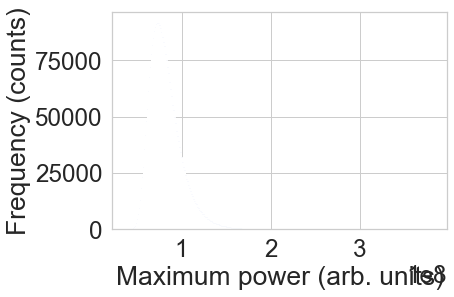

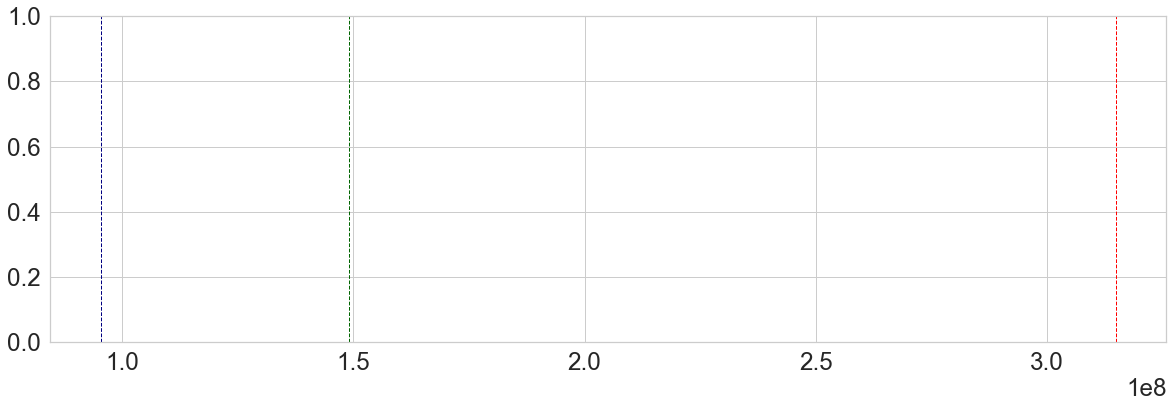

In [509]:
# Create histogram using Seaborn
sns.histplot(peaks, kde=False, color='royalblue', bins=1000)


# Add labels and etc
plt.xlabel('Maximum power (arb. units)')
plt.ylabel('Frequency (counts)')
plt.figure(figsize=(20, 6))
plt.tight_layout()
plt.axvline(powers_actual[-1], color='red', linestyle='dashed', linewidth=1, label='59.6 Hz')
plt.axvline(powers_actual[-3], color='darkgreen', linestyle='dashed', linewidth=1, label='60.5 Hz')
plt.axvline(powers_actual[-5], color='navy', linestyle='dashed', linewidth=1, label='30.3 Hz')

# Show plot
plt.show()

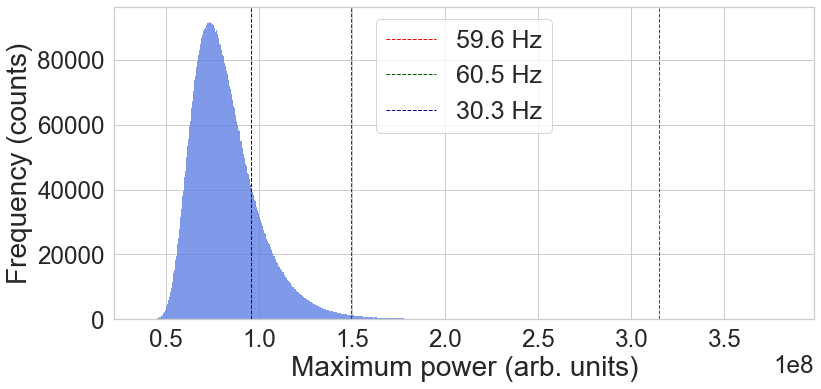

In [526]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create histogram using Seaborn
sns.histplot(peaks, kde=False, color='royalblue', bins=1000)

# Add labels and etc
plt.xlabel('Maximum power (arb. units)', fontsize=28)
plt.ylabel('Frequency (counts)', fontsize=28)
plt.axvline(powers_actual[-1], color='red', linestyle='dashed', linewidth=1, label='59.6 Hz')
plt.axvline(powers_actual[-3], color='darkgreen', linestyle='dashed', linewidth=1, label='60.5 Hz')
plt.axvline(powers_actual[-5], color='navy', linestyle='dashed', linewidth=1, label='30.3 Hz')

# Set legend
plt.legend(fontsize=25, loc = 'upper center')

# Show plot
plt.tight_layout()
plt.savefig('histogram.png')
plt.show()

In [409]:
from statistics import NormalDist

chances = np.load('chances.npy')

sigma_first = NormalDist().inv_cdf((2 - chances[0]) / 2.)
sigma_second = NormalDist().inv_cdf((2 - chances[1]) / 2.)
sigma_third = NormalDist().inv_cdf((2 - chances[2]) / 2.)
sigma_fourth = NormalDist().inv_cdf((2 - chances[3]) / 2.)
sigma_fifth = NormalDist().inv_cdf((2 - chances[4]) / 2.)
print("Sigma for the 1st peak:", sigma_first)
print("Sigma for the 2nd peak:", sigma_second)
print("Sigma for the 3rd peak:", sigma_third)
print("Sigma for the 4th peak:", sigma_fourth)
print("Sigma for the 5th peak:", sigma_fifth)

#Treating first second as independent events
sigma_combined60hz = NormalDist().inv_cdf((2 - chance1st * chance2nd) / 2.)
print("Sigma for the combined 1st and 2nd peak:", sigma_combined60hz)
sigmas = np.array([sigma_first, sigma_second, sigma_third, sigma_fourth, sigma_fifth, sigma_combined60hz])

np.save('sigmas.npy', sigmas)

Sigma for the 1st peak: 4.692414035387353
Sigma for the 2nd peak: 2.755218229784059
Sigma for the 3rd peak: 1.3013490643801593
Sigma for the 4th peak: 0.9284447784185146
Sigma for the 5th peak: 0.16341067299706255
Sigma for the combined 1st and 2nd peak: 5.652247755691892


## Folding data

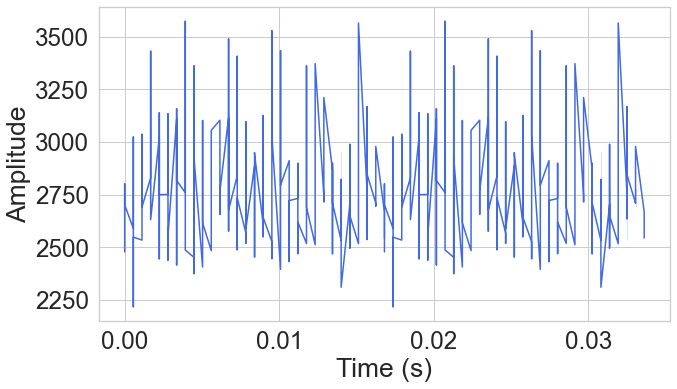

In [382]:
# Folding data
data = np.genfromtxt('pulsar.dat') #import data

def fold_data(foldfreq, time):
    foldperiod = 1/foldfreq
    foldedtime = time % foldperiod
    return foldedtime

testfreq = 59.5
foldedtime = fold_data(testfreq, time)

# Plot folded data
plt.figure(figsize=(10, 6))
sns.lineplot(x=foldedtime, y=data, color='royalblue')
sns.lineplot(x=foldedtime + 1/testfreq, y=data, color='royalblue')
#plt.title('Shuffled data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()



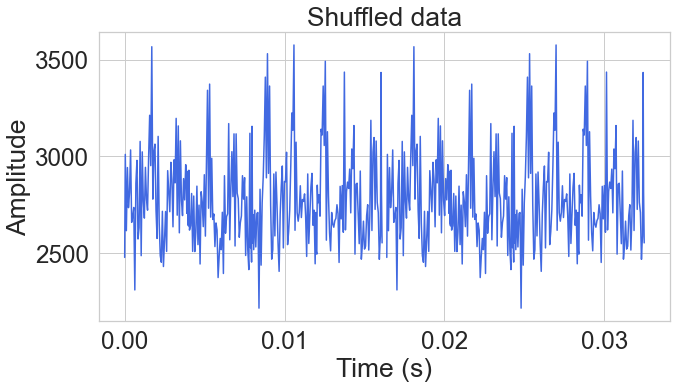

In [400]:
datus = data.copy()
tempo = foldedtime.copy()
idx   = np.argsort(tempo)

datus = np.array(datus)[idx]
tempo = np.array(tempo)[idx]

# Plot folded data
plt.figure(figsize=(10, 6))
sns.lineplot(x=tempo, y=datus, color='royalblue')
sns.lineplot(x=foldedtime + 1/testfreq, y=data, color='royalblue')
plt.title('Shuffled data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()


plt.show()

In [ ]:
'''
# Do a chi squared test
import scipy.stats as stats

avg = np.average(data)
print(stats.chisquare(binned))
'''

'\n# Do a chi squared test\nimport scipy.stats as stats\n\navg = np.average(data)\nprint(stats.chisquare(binned))\n'

In [410]:
# Phase binning
def phase_binning(data, foldedtime, nbins, period):
    phase = foldedtime/period
    phase = phase - np.floor(phase)

    phasebin = np.round(phase * nbins).astype(int)
    phase_data = np.zeros(nbins)
    error_data = np.zeros(nbins)
    phase_error = np.zeros(nbins)

    for i in range(nbins):
        if data[phasebin == i].size == 0:
            conca = np.concatenate((data[phasebin == i - 1], data[phasebin == i + 1]))
            phase_data[i] = (np.mean(conca)) # if no data in bin, take average of neighbouring bins
            error_data[i] = (np.std(conca))/np.sqrt(conca.size)
            here = 'if'
        else:
            phase_data[i] = np.mean(data[phasebin == i])
            error_data[i] = np.std(data[phasebin == i])/np.sqrt(data[phasebin == i].size)
            phase_error[i] = np.std(phase[phasebin == i])/np.sqrt(phase[phasebin == i].size)
            here = 'else'
        if error_data[i] == 0:
            error_data[i] == np.sqrt(np.mean(data[phasebin == i])) #assume poisson error if standard deviation is zero
    data_corner = np.concatenate((data[phasebin == 0], data[phasebin == nbins - 1]))
    phase_data[0] = np.mean(data_corner)
    phase_data[-1] = np.mean(data_corner)
    error_data[0] = np.std(data_corner)/np.sqrt(data_corner.size)
    error_data[-1] = np.std(data_corner)/np.sqrt(data_corner.size)
    return phase_data, error_data, phase_error

In [367]:
np.std(np.array([1]))

0.0

## Finding best frequency

In [498]:
i = 0
steps = 10000
min = 59
max = 60
bins = 15

def chisq(obs, exp, error):
    chisqr = 0
    for i in range(len(obs)):
        #if error[i] == 0:
            #print('error is zero at', obs[i])
        chisqr = chisqr + ((obs[i]-exp)**2)/(error[i]**2)
    return chisqr

Allchi = np.zeros(steps)
for f in np.linspace(min, max, steps):    
    datus = data.copy()
    foldedtime = fold_data(f, time)
    tempo = foldedtime.copy()
    idx   = np.argsort(tempo)
    datus = np.array(datus)[idx]
    tempo = np.array(tempo)[idx]
    binned, error_, phaseerror = phase_binning(datus, tempo, bins, 1/f)
    chi2 = chisq(binned, np.mean(binned), error_)
    Allchi[i] = chi2
    i += 1
#print('error is zero at', binned[error_ == 0])
print(Allchi)
print(np.argmax(Allchi))
print('Maximum chi2:', np.max(Allchi))
print('At Freq = ', min+np.argmax(Allchi)/(steps/(max-min)), "Hz")
Pulsarfreq = min+np.argmax(Allchi)/(steps/(max-min))
print(phaseerror)
f = Pulsarfreq
datus = data.copy()
foldedtime = fold_data(f, time)
tempo = foldedtime.copy()
idx   = np.argsort(tempo)
datus = np.array(datus)[idx]
tempo = np.array(tempo)[idx]
binned, error_, phaseerror  = phase_binning(datus, tempo, bins, 1/f)
chi2 = chisq(binned, np.mean(binned), error_)


[41.80102071 41.80102071 41.21813901 ... 62.68841861 62.68841861
 62.68841861]
5922
Maximum chi2: 133.6834103221482
At Freq =  59.5922 Hz
[0.00348967 0.00468386 0.00483488 0.00437041 0.00476366 0.00464324
 0.00484814 0.00421358 0.00484814 0.00438476 0.00484814 0.00438145
 0.00475194 0.00464324 0.00476366]


In [496]:
f = Pulsarfreq
datus = data.copy()
foldedtime = fold_data(f, time)
tempo = foldedtime.copy()
idx   = np.argsort(tempo)
datus = np.array(datus)[idx]
tempo = np.array(tempo)[idx]
binned, error_, phaseerror  = phase_binning(datus, tempo, bins, 1/f)
chi2 = chisq(binned, np.mean(binned), error_)

## Final binned plot of best frequency

59.5922 Hz


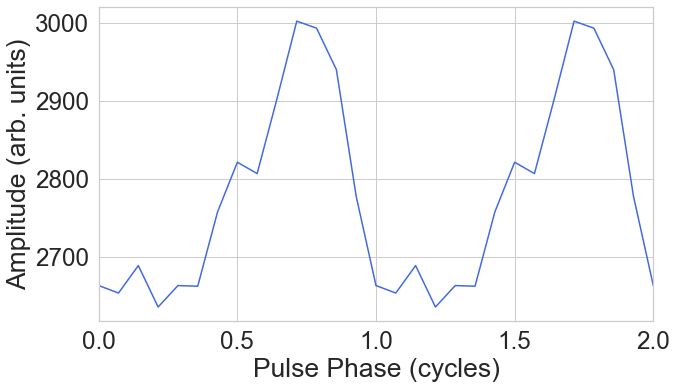

In [499]:
testfreq = Pulsarfreq
#binned = phase_binning(datus, tempo, 30, 1/testfreq)
print(testfreq, 'Hz')
# Plot folded data
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.linspace(0, 1, num=len(binned)), y=binned, color='royalblue')
sns.lineplot(x=np.linspace(0, 1, num=len(binned)) + 1, y=binned, color='royalblue')
plt.xlabel('Pulse Phase (cycles)')
plt.ylabel('Amplitude (arb. units)')
plt.xlim(0, 2)
#plt.ylim(2600,)
plt.tight_layout()
plt.savefig('binned_data.png')
plt.show()


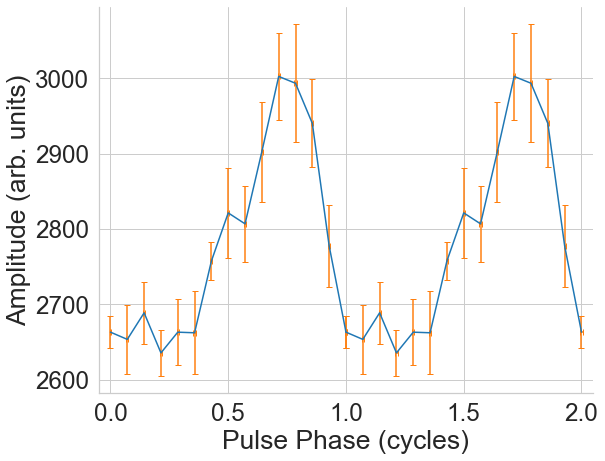

In [500]:
fig, ax = plt.subplots(figsize=(9,7))
ax.errorbar(np.linspace(0, 1, num=len(binned)), binned, error_,xerr=phaseerror, capsize=3, color='tab:blue', ecolor='tab:orange')
ax.errorbar(np.linspace(0, 1, num=len(binned)) + 1, binned, error_,xerr=phaseerror, capsize=3, color='tab:blue', ecolor='tab:orange')
ax.set_xlabel('Pulse Phase (cycles)')
ax.set_ylabel('Amplitude (arb. units)')
ax.set_xlim(-0.05, 2.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('binned_data_error.png')
plt.show()

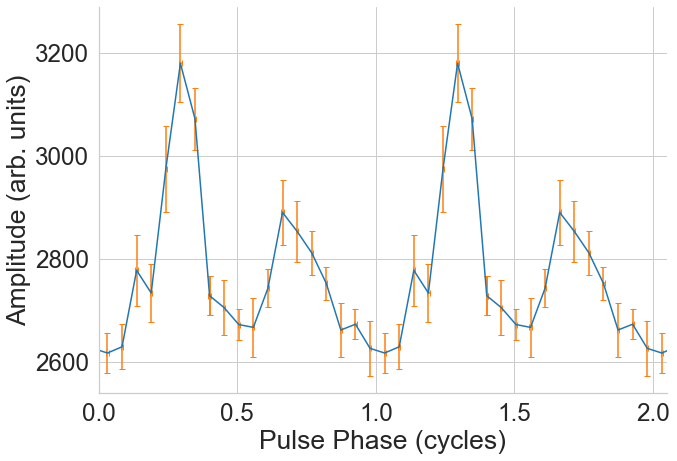

In [493]:
f = Pulsarfreq/2
bins = 20
datus = data.copy()
foldedtime = fold_data(f, time)
tempo = foldedtime.copy()
idx   = np.argsort(tempo)
datus = np.array(datus)[idx]
tempo = np.array(tempo)[idx]
binned, error_, phaseerror  = phase_binning(datus, tempo, bins, 1/f)
chi2 = chisq(binned, np.mean(binned), error_)

fig, ax = plt.subplots(figsize=(10,7))
ax.errorbar(np.linspace(0, 1, num=len(binned)) - 0.6, binned, error_,xerr=phaseerror, capsize=3, color='tab:blue', ecolor='tab:orange')
ax.errorbar(np.linspace(0, 1, num=len(binned)) + 0.4, binned, error_,xerr=phaseerror, capsize=3, color='tab:blue', ecolor='tab:orange')
ax.errorbar(np.linspace(0, 1, num=len(binned)) + 1.4, binned, error_,xerr=phaseerror, capsize=3, color='tab:blue', ecolor='tab:orange')
ax.set_xlabel('Pulse Phase (cycles)')
ax.set_ylabel('Amplitude (arb. units)')
ax.set_xlim(0, 2.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('binned_double_peak.png')
plt.show()

Most probable pulsar PSR J1748-2021B